<function matplotlib.pyplot.show(close=None, block=None)>

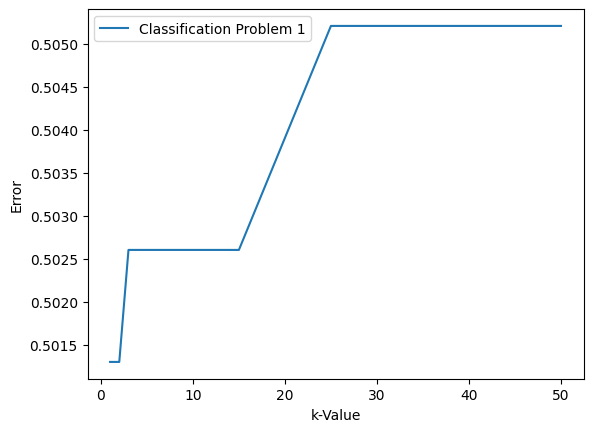

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#Cleaning up the data
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,:-2]
output1=data[:,-2:-1]
output1[output1<=22.3] = -1 #small heating load
output1[output1> 22.3] = 1 #large heating load
output2=data[:,-1:-1]
output2[output2<=24.6] = -1 #small cooling load
output2[output2> 24.6] = 1 #large cooling load

ks=[1, 2 , 3, 5, 10, 15, 25, 50]
#ks=[5]
timetotrain1=[]
error1=[]
timetotrain1=[]
predicvals1=[]
for k in ks:
    predicvals1=[]
    start=time.time()
    for a in range(input.shape[0]):
        x=input[a]
        distances=np.linalg.norm(input- a, axis=1)
        nearest_neighbor_k= distances.argsort()[:k]
        nearest_neighbor_vals=output1[nearest_neighbor_k]
        predict=nearest_neighbor_vals.mean()
        if predict>=0:
            predict=1
        else:
            predict=-1
        predicvals1.append(predict)
    end=time.time()
    times=end-start
    timetotrain1.append(times)
    error=output1.ravel()- predicvals1
    error=sum(abs(error/2))/len(predicvals1)
    error1.append(error)

import matplotlib.pyplot as plt
plt.plot(ks, error1)
plt.xlabel("k-Value")
plt.ylabel("Error")
plt.legend(["Classification Problem 1"])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

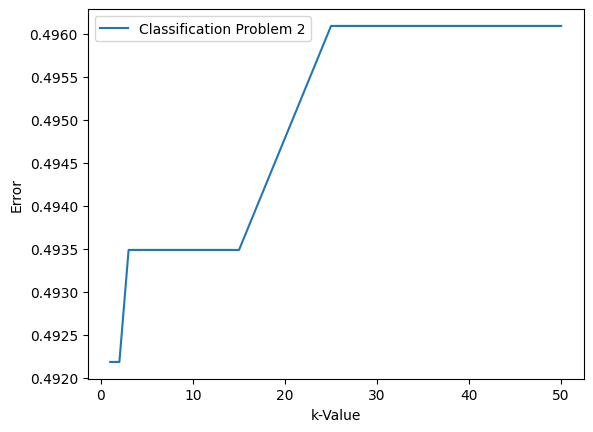

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
#Cleaning up the data
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,:-2]
output1=data[:,-2:-1]
output1[output1<=22.3] = -1 #small heating load
output1[output1> 22.3] = 1 #large heating load
output2=data[:,-1:]
output2[output2<=24.6] = -1 #small cooling load
output2[output2> 24.6] = 1 #large cooling load
ks=[1, 2 , 3, 5, 10, 15, 25, 50]
#ks=[5]
timetotrain2=[]
error2=[]
timetotrain2=[]
predicvals2=[]
for k in ks:
    predicvals2=[]
    start=time.time()
    for a in range(input.shape[0]):
        x=input[a]
        distances=np.linalg.norm(input- a, axis=1)
        nearest_neighbor_k= distances.argsort()[:k]
        nearest_neighbor_vals=output2[nearest_neighbor_k]
        predict=nearest_neighbor_vals.mean()
        if predict>=0:
            predict=1
        else:
            predict=-1
        predicvals2.append(predict)
    end=time.time()
    times=end-start
    timetotrain2.append(times)
    error=output2.ravel()- predicvals2
    error=sum(abs(error/2))/len(predicvals2)
    error2.append(error)

import matplotlib.pyplot as plt
plt.plot(ks, error2)
plt.xlabel("k-Value")
plt.ylabel("Error")
plt.legend(["Classification Problem 2"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

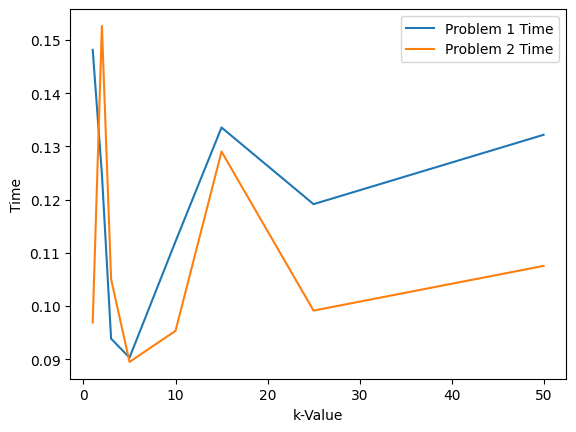

In [42]:
plt.plot(ks, timetotrain1, ks, timetotrain2)
plt.xlabel("k-Value")
plt.ylabel("Time")
plt.legend(["Problem 1 Time", "Problem 2 Time"])
plt.show